In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2

In [2]:
#load data set
df=pd.read_csv("Downloads\melborne_housing data.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
df.shape

(13580, 21)

In [5]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
df.Rooms.unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10], dtype=int64)

In [8]:
df.Rooms.value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

In [9]:
df.Bathroom.value_counts()

1    7512
2    4974
3     917
4     106
0      34
5      28
6       5
7       2
8       2
Name: Bathroom, dtype: int64

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


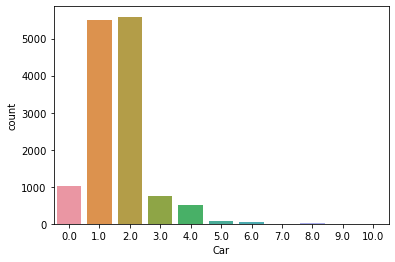

In [10]:
sns.countplot('Car',data=df)
plt.show()

In [11]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [12]:
melborn=df.copy()

In [13]:
melborn.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [14]:
melborn.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [15]:
melborn['Car'].fillna(0,axis=0,inplace=True)

In [16]:
melborn.BuildingArea.mean()

151.96764988779805

In [17]:
melborn.BuildingArea.std()

541.0145376263513

In [18]:
melborn[melborn['BuildingArea']>6791].index

Int64Index([13245], dtype='int64')

In [19]:
melborn.drop(index=13245,axis=0,inplace=True)

In [20]:
melborn['BuildingArea'].fillna(melborn.BuildingArea.mean(),axis=0,inplace=True)

In [21]:
melborn['YearBuilt'].mode()

0    1970.0
dtype: float64

In [22]:
melborn.YearBuilt.value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1901.0      1
1921.0      1
1898.0      1
1884.0      1
1897.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [23]:
#one hot encoding
melborn.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496653,0.293678,0.054756,0.944171,0.592797,0.408061,0.024040,0.309746,-0.065413,0.015249,0.101468,-0.081311
Price,0.496653,1.000000,-0.162982,0.107803,0.475967,0.467051,0.234821,0.037320,0.277145,-0.323617,-0.213237,0.203898,-0.042108
Distance,0.293678,-0.162982,1.000000,0.430643,0.295404,0.126361,0.264936,0.019878,0.084454,0.246379,-0.133162,0.241798,-0.054280
Postcode,0.054756,0.107803,0.430643,1.000000,0.060041,0.113167,0.047616,0.021690,0.042234,0.032863,-0.407819,0.446888,0.062748
Bedroom2,0.944171,0.475967,0.295404,0.060041,1.000000,0.584546,0.404740,0.024007,0.300017,-0.053319,0.015226,0.102936,-0.081131
Bathroom,0.592797,0.467051,0.126361,0.113167,0.584546,1.000000,0.322085,0.035577,0.283937,0.152702,-0.071358,0.119669,-0.051978
Car,0.408061,0.234821,0.264936,0.047616,0.404740,0.322085,1.000000,0.023729,0.164023,0.112949,-0.002857,0.065424,-0.023320
Landsize,0.024040,0.037320,0.019878,0.021690,0.024007,0.035577,0.023729,1.000000,0.011541,0.036451,0.006092,0.014077,-0.005656
BuildingArea,0.309746,0.277145,0.084454,0.042234,0.300017,0.283937,0.164023,0.011541,1.000000,0.018574,-0.022877,0.062563,-0.034466
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.112949,0.036451,0.018574,1.000000,0.060445,-0.003470,0.006361


<AxesSubplot:>

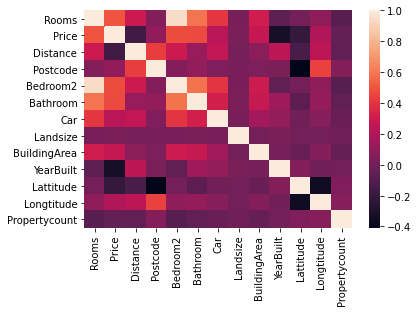

In [24]:
sns.heatmap(melborn.corr())

In [25]:
melborn.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [26]:
for col in melborn.columns:
    print(col,":" ,len(melborn[col].unique()))

Suburb : 313
Address : 13377
Rooms : 9
Type : 3
Price : 2204
Method : 5
SellerG : 268
Date : 58
Distance : 201
Postcode : 197
Bedroom2 : 12
Bathroom : 9
Car : 11
Landsize : 1447
BuildingArea : 602
YearBuilt : 145
CouncilArea : 34
Lattitude : 6502
Longtitude : 7062
Regionname : 8
Propertycount : 310


In [27]:
top15=[x for x in melborn.CouncilArea.value_counts().head(15).index]
top15

['Moreland',
 'Boroondara',
 'Moonee Valley',
 'Darebin',
 'Glen Eira',
 'Stonnington',
 'Maribyrnong',
 'Yarra',
 'Port Phillip',
 'Banyule',
 'Bayside',
 'Melbourne',
 'Hobsons Bay',
 'Brimbank',
 'Monash']

In [28]:
for label in top15:
    melborn[label]=np.where(melborn['CouncilArea']==label,1,0)
    

In [29]:
 melborn[['CouncilArea']+top15].head(10)

,CouncilArea,Moreland,Boroondara,Moonee Valley,Darebin,Glen Eira,Stonnington,Maribyrnong,Yarra,Port Phillip,Banyule,Bayside,Melbourne,Hobsons Bay,Brimbank,Monash
0,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,Yarra,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
melborn.Suburb.value_counts().head(20)

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Essendon          220
South Yarra       202
Glen Iris         195
Hawthorn          191
Coburg            190
Northcote         188
Brighton          186
Kew               177
Pascoe Vale       171
Balwyn North      171
Yarraville        164
St Kilda          162
Glenroy           159
Port Melbourne    153
Moonee Ponds      149
Name: Suburb, dtype: int64

In [31]:
def one_hot_top_x(df,variable,top_x_lables):
    
    for label in top_x_lables:
        df[variable+'_'+label]=np.where(melborn[variable]==label, 0,1)

In [32]:
suburb_15=[x for x in melborn.Suburb.value_counts().head(15).index]
suburb_15

['Reservoir',
 'Richmond',
 'Bentleigh East',
 'Preston',
 'Brunswick',
 'Essendon',
 'South Yarra',
 'Glen Iris',
 'Hawthorn',
 'Coburg',
 'Northcote',
 'Brighton',
 'Kew',
 'Pascoe Vale',
 'Balwyn North']

In [33]:
one_hot_top_x(melborn,'Suburb',suburb_15)

In [34]:
melborn.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Suburb_Essendon,Suburb_South Yarra,Suburb_Glen Iris,Suburb_Hawthorn,Suburb_Coburg,Suburb_Northcote,Suburb_Brighton,Suburb_Kew,Suburb_Pascoe Vale,Suburb_Balwyn North
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1,1,1,1,1,1,1,1,1
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,1,1,1,1,1,1,1,1,1
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,1,1,1,1,1,1,1,1,1,1
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,1,1,1,1,1,1,1,1,1,1
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,1,1,1,1,1,1,1,1,1


In [35]:
df.SellerG.value_counts().head(15)

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Marshall          659
Buxton            632
Biggin            393
Brad              342
Fletchers         301
Woodards          301
Jas               243
Greg              239
McGrath           222
Sweeney           216
Name: SellerG, dtype: int64

In [36]:
SellerG_15=[x for x in melborn.SellerG.value_counts().head(15).index]
SellerG_15

['Nelson',
 'Jellis',
 'hockingstuart',
 'Barry',
 'Ray',
 'Marshall',
 'Buxton',
 'Biggin',
 'Brad',
 'Fletchers',
 'Woodards',
 'Jas',
 'Greg',
 'McGrath',
 'Sweeney']

In [37]:
one_hot_top_x(melborn,'SellerG',SellerG_15)

In [38]:
melborn.Propertycount

0        4019
1        4019
2        4019
3        4019
4        4019
         ... 
13575    7392
13576    6380
13577    6380
13578    6380
13579    6543
Name: Propertycount, Length: 13579, dtype: int64

In [39]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [40]:
melborn.drop(['Suburb','CouncilArea','SellerG'],axis=1,inplace=True)

In [41]:
melborn.drop(['Address','Lattitude','Longtitude','Regionname','Propertycount'],axis=1,inplace=True)

In [42]:

melborn=pd.get_dummies(melborn,columns=['Method','Type'],drop_first=True)

In [43]:
melborn.drop('Date',axis=1,inplace=True)

In [44]:
melborn.YearBuilt.mode()

0    1970.0
dtype: float64

In [45]:
melborn.YearBuilt.fillna(1970,axis=0,inplace=True)

In [46]:
melborn.drop('Bedroom2',axis=1,inplace=True)

In [47]:
x=melborn.drop('Price',axis=1)
y=melborn['Price']

In [48]:
x

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Moreland,Boroondara,...,SellerG_Jas,SellerG_Greg,SellerG_McGrath,SellerG_Sweeney,Method_S,Method_SA,Method_SP,Method_VB,Type_t,Type_u
0,2,2.5,3067,1,1.0,202,145.744753,1970.0,0,0,...,1,1,1,1,1,0,0,0,0,0
1,2,2.5,3067,1,0.0,156,79.000000,1900.0,0,0,...,1,1,1,1,1,0,0,0,0,0
2,3,2.5,3067,2,0.0,134,150.000000,1900.0,0,0,...,1,1,1,1,0,0,1,0,0,0
3,3,2.5,3067,2,1.0,94,145.744753,1970.0,0,0,...,1,1,1,1,0,0,0,0,0,0
4,4,2.5,3067,1,2.0,120,142.000000,2014.0,0,0,...,1,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150,2,2.0,652,145.744753,1981.0,0,0,...,1,1,1,1,1,0,0,0,0,0
13576,3,6.8,3016,2,2.0,333,133.000000,1995.0,0,0,...,1,1,1,1,0,0,1,0,0,0
13577,3,6.8,3016,2,4.0,436,145.744753,1997.0,0,0,...,1,1,1,1,1,0,0,0,0,0
13578,4,6.8,3016,1,5.0,866,157.000000,1920.0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [49]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)

In [50]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)


In [51]:
bestfeatures=pd.concat([dfcolumns,dfscores],axis=1)


In [52]:
bestfeatures.columns=['specs','scores']

In [53]:
print(bestfeatures.nlargest(15,"scores"))

           specs        scores
5       Landsize  3.825769e+07
6   BuildingArea  1.909095e+05
1       Distance  8.994087e+03
2       Postcode  6.958608e+03
58        Type_u  4.549140e+03
9     Boroondara  3.510737e+03
18       Bayside  2.980644e+03
13   Stonnington  2.614001e+03
22        Monash  2.413270e+03
56     Method_VB  2.272743e+03
19     Melbourne  2.181730e+03
15         Yarra  2.173331e+03
16  Port Phillip  2.147927e+03
14   Maribyrnong  2.141195e+03
12     Glen Eira  2.086848e+03


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [56]:
reg.score(x_test,y_test)

0.6465390631313577

In [57]:
reg.score(x_train,y_train)

0.6162846597128059

In [61]:
reg.coef_

array([ 1.63376525e+05, -3.73458146e+04,  5.94004363e+02,  1.88747978e+05,
        4.97940672e+04,  3.37214695e+00,  4.69765562e+02, -2.28397079e+03,
       -2.24358251e+05,  3.29718108e+05, -1.21424337e+05, -1.76236305e+04,
        1.27237839e+05,  2.36719368e+05, -2.08899025e+05, -1.71715703e+03,
        1.03552612e+05, -9.20438178e+04,  3.04508828e+05, -2.87320391e+04,
       -6.68903457e+04, -2.99647549e+05,  1.04494979e+05,  1.75785587e+05,
        7.04301870e+04,  6.83638057e+04,  1.69838941e+05, -6.78562467e+04,
       -1.76681841e+05,  7.52062861e+04, -6.81646071e+03,  1.58556202e+05,
        5.85152600e+03, -1.02065893e+05, -3.80804779e+05, -3.62960535e+04,
       -3.23373135e+04, -3.90791566e+04,  2.67637650e+04, -1.06510357e+05,
        5.71396872e+04,  4.79724015e+04,  7.44967263e+04, -3.46240911e+05,
       -6.63984487e+04,  8.21869030e+04,  2.60717610e+04, -8.18510499e+04,
       -1.66644161e+03,  2.28131960e+04, -9.26405731e+04, -5.83290414e+04,
        4.97242086e+04,  

In [58]:
y_pred=reg.predict(x_test)

In [59]:
print('True values:',y_test)
print('predicted values:',y_pred)

True values: 11482     652000
11047     714000
9421     1490000
6906      660000
11559     280000
          ...   
2412     1134000
7827      700000
2740      745000
7070     2200000
4430     1085000
Name: Price, Length: 4074, dtype: int64
predicted values: [ 177352.28112419  702047.27054531 1840106.22803422 ...  918838.15936115
 1524960.92121987 1345852.97842593]


C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


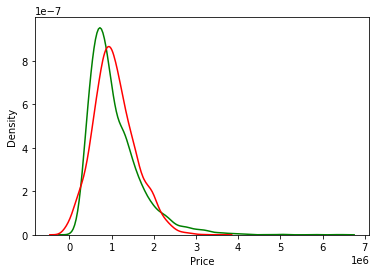

In [60]:
ax=sns.distplot(y_test,hist=False,color='green')
sns.distplot(y_pred,ax,hist=False,color='red')
plt.show()
